In [2]:
import requests
import numpy as np
import pandas as pd

import time

from tqdm import tqdm
from tqdm import trange

In [2]:
api_key_list = [
'RGAPI-84cb65f4-62eb-443c-8eb2-c5b4a3263e9f',
'RGAPI-ad035195-d843-4423-bae1-d8034ccf42c2',
'RGAPI-8b36f88e-adcf-4e29-b35e-3fb42616c742',
'RGAPI-80d35911-8610-4124-b8e8-8c8884650649',
'RGAPI-0ae9dc94-16c9-4193-b8fe-09d1e56ce4cb',
'RGAPI-5abbde2b-e90d-41ea-8ab2-05bab1880484',
'RGAPI-51dcfd9c-a089-4acb-8291-a7e5db85980c',
'RGAPI-acae04e7-6484-4c28-a721-10182e472ffc'
]
#default
key_idx = 0
api_key = api_key_list[key_idx]

# update
# key_idx = (key_idx+1)%len(api_key_list)
# api_key = api_key_list[key_idx]

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
ssafy_df = pd.read_excel('lolBTI설문.xlsx', index_col=0)
ssafy_mbti = Counter(ssafy_df['MBTI'])
ssafy_mbti.keys()

dict_keys(['ENTP', 'ENFJ', 'INFP', 'ISFP', 'ISFJ', 'ESTP', 'ESTJ', 'ENFP', 'ESFJ', 'INTJ', 'INTP', 'ESFP', 'ISTP', 'ISTJ', 'INFJ', 'ENTJ'])

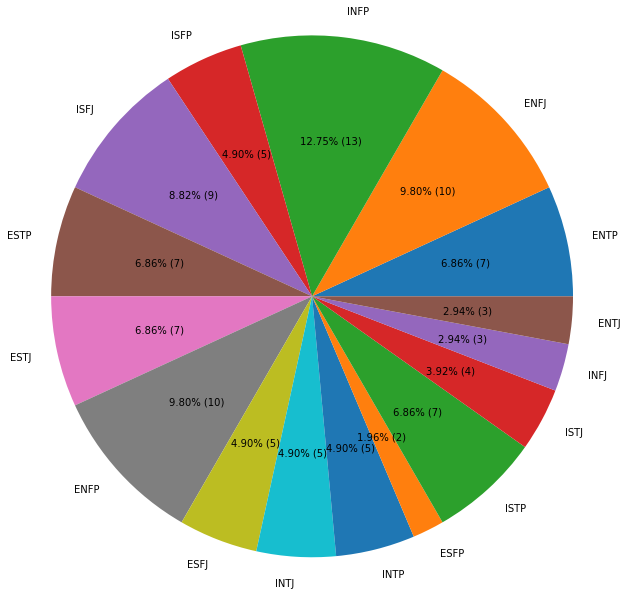

In [5]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(ssafy_mbti.values(), labels=ssafy_mbti.keys(), autopct=make_autopct(ssafy_mbti.values()),radius=3)
plt.rcParams.update({'font.size': 15})
plt.show()

In [6]:
def available_sohwan(sohwan_name):
    api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
    api_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + sohwan_name +'?api_key=' + api_key
    
    try:
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.status_code
    except:
        return

In [21]:
available_sohwan('임권호 분당거주')

In [ ]:
ssafy_df['소환사 이름(ex: hide on bush)'].apply(available_sohwan)

In [ ]:
ssafy_df['소환사가능여부']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(available_sohwan)

In [ ]:
ssafy_df[ssafy_df['소환사가능여부']!=200]

In [ ]:
ssafy_df[ssafy_df['소환사가능여부']==200]

In [ ]:
def get_sohwan(sohwan_name):
    try:
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + sohwan_name +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()
    except:
        return

In [ ]:
def get_tier(sohwan_name):
    
    try:
        sohwan_id = get_sohwan(sohwan_name)['id']
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + sohwan_id +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()[-1]['tier']
    except:
        return

In [ ]:
get_sohwan('hide on bush')

In [ ]:
get_tier('hide on bush')

In [ ]:
ssafy_df['tier']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(get_tier)

In [ ]:
def get_rank(sohwan_name):
    
    try:
        sohwan_id = get_sohwan(sohwan_name)['id']
        api_key = 'RGAPI-e46e0823-d634-4337-b492-f131cff74c71'
        api_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + sohwan_id +'?api_key=' + api_key
        r = requests.get(api_url)
        if r.status_code == 200: # response가 정상이면 바로 맨 밑으로 이동하여 정상적으로 코드 실행
            pass

        elif r.status_code == 429:
            print('api cost full : infinite loop start')
            start_time = time.time()

            while True: # 429error가 끝날 때까지 무한 루프
                if r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: #다시 response 200이면 loop escape
                    print('total wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break

        elif r.status_code == 503: # 잠시 서비스를 이용하지 못하는 에러
            print('service available error')
            start_time = time.time()

            while True:
                if r.status_code == 503 or r.status_code == 429:

                    print('try 10 second wait time')
                    time.sleep(10)

                    r = requests.get(api_url)
                    print(r.status_code)

                elif r.status_code == 200: # 똑같이 response가 정상이면 loop escape
                    print('total error wait time : ', time.time() - start_time)
                    print('recovery api cost')
                    break
        return r.json()[0]['rank']
    except:
        return

In [ ]:
ssafy_df['rank']=ssafy_df['소환사 이름(ex: hide on bush)'].apply(get_rank)

In [ ]:
ssafy_df

In [ ]:
ssafy_df['랭크'] = ssafy_df['tier'] + " " + ssafy_df['rank']

In [ ]:
def tier_to_val(tier):
    if tier == "CHALLENGER" :
        return 10,
    elif tier == "GRANDMASTER" :
        return 20
    elif tier == "MASTER" :
        return 30
    elif tier == "DIAMOND" :
        return 40
    elif tier == "PLATINUM" :
        return 50
    elif tier == "GOLD" :
        return 60
    elif tier == "SILVER" :
        return 70
    elif tier == "BRONZE" :
        return 80
    elif tier == "IRON" :
        return 90
    else:
        return 100
def rank_to_val(rank):
    if rank == "I" :
        return 1
    elif rank == "II" :
        return 2
    elif rank == "III" :
        return 3
    elif rank == "IV" :
        return 4
    else:
        return 0


In [ ]:
tier_to_val("None","None")

In [ ]:
ssafy_df['ssafy_tier_val'] = ssafy_df['tier'].apply(tier_to_val)+ssafy_df['rank'].apply(rank_to_val)

In [ ]:
ssafy_tier = Counter(ssafy_df.sort_values(by=['ssafy_tier_val'])['랭크'])

In [ ]:
ssafy_df.sort_values(by=['ssafy_tier_val'])

In [ ]:
plt.pie(ssafy_tier.values(), labels=ssafy_tier.keys(), autopct=make_autopct(ssafy_tier.values()),radius=3)
plt.rcParams.update({'font.size': 15})
plt.show()